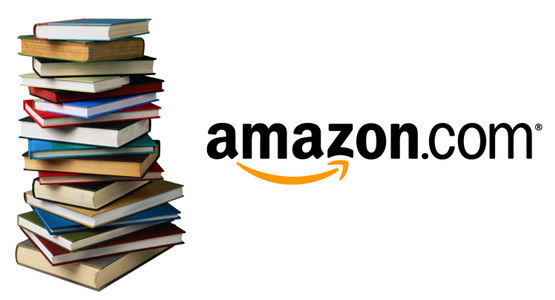

<a id="start"></a>
## <p style="background-color:PaleTurquoise; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">Table of Content</p>
[Introduction](#intro)

[Import Libraries](#import-libraries)

1. [Data Preparation 🔎](#data-prep)

2. [Data Visualization 📊](#data-vis)

    2.1. [Genres Analysis 📖](#genres-analysis)
    
    2.1.1. [Genre Ratio by Year](#genres-ratio)
    
    2.1.2. [Average User Rating by Genre per Year](#genres-rating)
    
    2.1.3. [Average Price by Genre per Year](#genres-price)
    
    2.1.4. [Average Reviews by Genre per Year](#genres-reviews)
    
    2.2. [Books Analysis 📚](#books-analysis)
    
    2.2.1. [Top 30 multiple best-selling Books](#books-multiple)
    
    2.2.2. [The most reviewed Books](#books-reviews)
    
    2.2.3. [The most expensive Books](#books-price)
    
    2.2.4. [The highest rated Books](#books-rating)
    
    2.3. [Correlation between numerical Features](#correlation)
    
    2.3.1. [Data with Outliers](#correlation-outliers)
    
    2.3.2. [Data without Outliers](#correlation-woutliers)
    
    2.4. [Authors Analysis ✍️](#authors-analysis)
    
    2.4.1. [Top multiple best-selling Authors](#authors-multiple)
    
    2.4.1.1. [Best-selling Authors in both Genres](#authors-both)
    
    2.4.2. [The most reviewed Authors](#authors-reviews)
    
    2.4.3. [Authors with the most expensive Books](#authors-price)
    
    2.4.4. [The highest-rated Authors](#authors-rating)
    

<a id="intro"></a>
# Introduction

<font size='4'>Amazon is the world's largest online marketplace, AI assistant provider, live-streaming platform and cloud computing platform as measured by revenue and market capitalization. Amazon is the largest Internet company by revenue in the world. It is the second largest private employer in the United States and one of the world's most valuable companies. As of 2020, Amazon has the highest global brand valuation. </font> <a href="https://en.wikipedia.org/wiki/Amazon_(company)">[wiki]</a>
    
<font size='4'>This kernel focuses on researching Amazons top 50 bestsellers between 2009 and 2019.
We will find out which genres, books and authors were the most popular. How the rating, price and reviews of books changed during this period and also analyze the relationship between these features.</font> 

<a id="import-libraries"></a>
# Import Libraries

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# other
import warnings
warnings.filterwarnings("ignore")

<a id="data-prep"></a>
# <p style="background-color:PaleTurquoise; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">1. Data Preparation 🔎</p>


In [ ]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df.head()

In [ ]:
df.info()

<font size='4'>As we see, there is no NaN values</font>


In [ ]:
df.describe()

<font size='4'>it's worth noting that Reviews, Price and User Rating columns contain outliers which we'll analyze later</font>


<a id="data-vis"></a>
# <p style="background-color:PaleTurquoise; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">2. Data Visualization 📊</p>

<a id="genres-analysis"></a>
## 2.1. Genres analysis 📖

<a id="genres-ratio"></a>
### 2.1.1. Genre Ratio by Year

In [ ]:
df_genre_year = df.groupby(['Genre', 'Year'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'count'}).sort_values('Year')

In [ ]:
fig = make_subplots(rows=2,
                    cols=2,
                    column_widths=[0.5, 0.5],
                    row_heights=[0.7, 0.3],
                    vertical_spacing=0.08,
                    specs=[[{'colspan': 2}, {}],
                           [{'type': 'xy'}, None]],
                    subplot_titles=['Genre Ratio by Year']
                   )



fig.add_trace(
        go.Bar(
            name="Non Fiction",
            x=df_genre_year[df_genre_year['Genre']=='Non Fiction']['Year'],
            y=df_genre_year[df_genre_year['Genre']=='Non Fiction']['count'],
            marker_color='orangered',
            offsetgroup=0
        ),
    row=1,
    col=1
            )
fig.add_trace(
        go.Bar(
            name="Fiction",
            x=df_genre_year[df_genre_year['Genre']=='Fiction']['Year'],
            y=df_genre_year[df_genre_year['Genre']=='Fiction']['count'],
            marker_color='black',
            offsetgroup=1
        ),
    row=1,
    col=1
            )

fig.add_trace(
        go.Bar(
            x=df_genre_year.groupby('Genre', as_index=False).agg({'count': 'sum'})['count'],
            y=df_genre_year.groupby('Genre', as_index=False).agg({'count': 'sum'})['Genre'],
            orientation='h',
            text=df_genre_year.groupby('Genre', as_index=False).agg({'count': 'sum'})['count'],
            textposition="inside", 
            marker_color=['black', 'orangered'],
            showlegend=False
        ),
    row=2,
    col=1
            )
fig.update_xaxes(dtick=1, row=1, col=1)
fig.update_layout(template='simple_white', height=800)
fig.update_xaxes(visible=False, row=2, col=1)
fig['layout']['annotations'][0].update(x=0.5, y=1.05)
fig.show()

<a id="genres-rating"></a>
### 2.1.2. Average User Rating by Genre per Year

In [ ]:
df_genre_rate_year = df.groupby(['Genre', 'Year'], as_index=False).agg({'User Rating': 'mean'}).round(3).sort_values('Year')

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            name='Fiction',
            x=df_genre_rate_year.query('Genre=="Fiction"')['Year'],
            y=df_genre_rate_year.query('Genre=="Fiction"')['User Rating'],
            marker_color='black',
        ),
        go.Scatter(
            name='Non Fiction',
            x=df_genre_rate_year.query('Genre=="Non Fiction"')['Year'],
            y=df_genre_rate_year.query('Genre=="Non Fiction"')['User Rating'],
            marker_color='orangered',
        ),
    ],
    layout=go.Layout(
    template='seaborn',
    title='Average User Rating by Year',
    title_x=0.5,
    yaxis_title='User Rating',
    xaxis_dtick=1,
    xaxis_title='Year')
)
fig.show()

<a id="genres-price"></a>
### 2.1.3. Average Price by Genre per Year

<font size='4'>Let's select rows which Price isn't equal 0</font>

In [ ]:
df_price_year = df[df['Price']>0].groupby(['Genre', 'Year'], as_index=False).agg({'Price': 'mean'}).round(1).sort_values('Year')

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            name='Fiction',
            x=df_price_year.query('Genre=="Fiction"')['Year'],
            y=df_price_year.query('Genre=="Fiction"')['Price'],
            marker_color='black',
        ),
        go.Scatter(
            name='Non Fiction',
            x=df_price_year.query('Genre=="Non Fiction"')['Year'],
            y=df_price_year.query('Genre=="Non Fiction"')['Price'],
            marker_color='orangered',
        ),
    ],
    layout=go.Layout(
    template='seaborn',
    title='Average Price by Genre per Year',
    title_x=0.5,
    yaxis_title='Price, $',
    xaxis_dtick=1,
    xaxis_title="Year")
)
fig.show()

<a id="genres-reviews"></a>
### 2.1.4. Average Reviews by Genre per Year

In [ ]:
df_genre_rev_year = df.groupby(['Genre', 'Year'], as_index=False).agg({'Reviews': 'mean'}).astype({'Reviews':'int'}).sort_values('Year')

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            name='Fiction',
            x=df_genre_rev_year.query('Genre=="Fiction"')['Year'],
            y=df_genre_rev_year.query('Genre=="Fiction"')['Reviews'],
            marker_color='black',
        ),
        go.Scatter(
            name='Non Fiction',
            x=df_genre_rev_year.query('Genre=="Non Fiction"')['Year'],
            y=df_genre_rev_year.query('Genre=="Non Fiction"')['Reviews'],
            marker_color='orangered',
        ),
    ],
    layout=go.Layout(
    template='seaborn',
    title='Average Reviews by Genre per Year',
    title_x=0.5,
    yaxis_title='Reviews',
    xaxis_dtick=1)
)
fig.show()

* <font size='4'>The Number of Books in Genre Non Fiction is usually more than Fiction (except 2014);</font>
* <font size='4'>The Average User Rating is higher for Fiction than for Non Fiction (except 2012, 2013);</font>
* <font size='4'>The Average Price for Books of Non Fiction Genre is higher than Fiction (except for 2009);</font>
* <font size='4'>The Average Reviews for Fiction Books is more than Non Fiction (except 2018).</font>



<a id="books-analysis"></a>
## 2.2. Books Analysis 📚

In [ ]:
df_wo_dupl = df.drop_duplicates(subset=['Name', 'Author', 'Reviews'])
df_wo_dupl.shape

<a id="books-multiple"></a>
### 2.2.1. Top 30 multiple best-selling Books

In [ ]:
df_multiple_books = df.groupby(['Name', 'Author', 'Genre'], as_index=False).agg({'Reviews':'count'}).sort_values('Reviews', ascending=False)

In [ ]:
colors = ['coral', 'mediumturquoise']

fig = make_subplots(rows=2,
                    cols=2,
                    column_widths=[0.8, 0.2],
                    row_heights=[0.3, 0.7],
                    specs=[[None, {"type": "domain"}],
                         [{'colspan': 2}, None]],
                    vertical_spacing=1,
                    horizontal_spacing = 0.1,
                    subplot_titles =['Genre\'s Distribution', 'Top 30 multiple best-selling books']
                          )



fig.add_trace(
        go.Bar(
            x=df_multiple_books['Name'][:30],
            y=df_multiple_books['Reviews'][:30],
            text=df_multiple_books['Genre'][:30],
            textposition="inside",
            marker_color='darkslateblue',
            textfont_color=[colors[0] if x == 'Fiction' else colors[1] for x in df_multiple_books['Genre'][:30]],
            showlegend=False,
            ),
    row=2,
    col=1
            )
fig.add_trace(
    go.Pie(
        labels=df_multiple_books[:30].Genre.value_counts().index.tolist(),
        values=df_multiple_books[:30].Genre.value_counts().values.tolist(),
        marker=dict(colors=colors[::-1], line=dict(color='#000000', width=1))
        ),
    row=1,
    col=2
        )

fig.update_yaxes(title_text="Number of times", row=2, col=1)
fig.update_layout(template='simple_white', height=1000)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=df_multiple_books['Name'][:30].apply(lambda x: ' '.join((x.split())[:5])+'...' if len(x.split()) > 5 else x),
                 tickvals=df_multiple_books['Name'][:30], row=2, col=1)



fig['layout']['annotations'][0].update(x=0.9, y=0.9)
fig['layout']['annotations'][1].update(x=0.4, y=0.9)
fig.show()

<a id="books-reviews"></a>
### 2.2.2. The most reviewed Books

In [ ]:
most_review_df = df_wo_dupl.groupby(['Name', 'Genre'], as_index=False).agg({'Reviews': 'sum'}).sort_values('Reviews', ascending=False)

In [ ]:

fig = make_subplots(rows=2,
                    cols=2,
                    column_widths=[0.8, 0.2],
                    row_heights=[0.2, 0.8],
                    specs=[[None, {"type": "domain"}],
                         [{'colspan': 2}, None]],
                    vertical_spacing=1,
                    horizontal_spacing = 0.01,
                    subplot_titles =['Genre\'s Distribution', 'Top 30 most Reviewed Books']
                          )


fig.add_trace(
        go.Bar(
            x=most_review_df['Name'][:30],
            y=most_review_df['Reviews'][:30],
            text=most_review_df['Genre'][:30],
            textposition="inside",
            marker_color='darkslateblue',
            textfont_color=[colors[0] if x == 'Fiction' else colors[1] for x in most_review_df['Genre'][:30]],
            showlegend=False,
            ),
    row=2,
    col=1
            )
fig.add_trace(
    go.Pie(
        labels=most_review_df[:30].Genre.value_counts().index.tolist(),
        values=most_review_df[:30].Genre.value_counts().values.tolist(),
        marker=dict(colors=colors, line=dict(color='#000000', width=1))
        ),
    row=1,
    col=2
        )


fig.update_yaxes(title_text="Reviews", row=2, col=1)
fig.update_layout(template='simple_white', height=800)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_review_df['Name'][:30].apply(lambda x: ' '.join((x.split())[:5])+'...' if len(x.split()) > 5 else x),
                 tickvals=most_review_df['Name'][:30], row=2, col=1)

fig['layout']['annotations'][0].update(x=0.9, y=0.9)
fig['layout']['annotations'][1].update(x=0.4, y=0.9)
fig.show()


<a id="books-price"></a>
### 2.2.3. The most expensive Books

In [ ]:
most_expensive_df = df_wo_dupl.groupby(['Name', 'Author', 'Genre'], as_index=False).agg({'Price': 'mean'}).sort_values('Price', ascending=False)

In [ ]:
fig = make_subplots(rows=2,
                    cols=2,
                    column_widths=[0.8, 0.2],
                    row_heights=[0.2, 0.8],
                    specs=[[None, {"type": "domain"}],
                         [{'colspan': 2}, None]],
                    vertical_spacing=1,
                    horizontal_spacing = 0.01,
                    subplot_titles =['Genre\'s Distribution', 'Top 30 Most Expensive Books']
                          )

fig.add_trace(
        go.Bar(
            x=most_expensive_df['Name'][:30],
            y=most_expensive_df['Price'][:30],
            text=most_expensive_df['Genre'][:30],
            textposition="inside",
            marker_color='darkslateblue',
            textfont_color=[colors[0] if x == 'Fiction' else colors[1] for x in most_expensive_df['Genre'][:30]],
            showlegend=False,
            ),
    row=2,
    col=1
            )
fig.add_trace(
    go.Pie(
        labels=most_expensive_df[:30].Genre.value_counts().index.tolist(),
        values=most_expensive_df[:30].Genre.value_counts().values.tolist(),
        marker=dict(colors=colors[::-1], line=dict(color='#000000', width=1))
        ),
    row=1,
    col=2
        )


fig.update_yaxes(title_text="Price, $", row=1, col=1)
fig.update_layout(template='simple_white', height=1000)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_expensive_df['Name'][:30].apply(lambda x: ' '.join((x.split())[:5])+'...' if len(x.split()) > 5 else x),
                 tickvals=most_expensive_df['Name'][:30], row=2, col=1)

fig['layout']['annotations'][0].update(x=0.9, y=0.9)
fig['layout']['annotations'][1].update(x=0.4, y=0.9)
fig.show()


<a id="books-rating"></a>
### 2.2.4. The highest rated Books

In [ ]:
high_rate_df = df_wo_dupl.groupby(['Name', 'Author', 'Genre'], as_index=False).agg({'User Rating': 'mean'}).sort_values('User Rating', ascending=False)
high_rate_df_4dot9 = high_rate_df[high_rate_df['User Rating']==4.9]

In [ ]:
fig = make_subplots(rows=2,
                    cols=1,
                    specs=[[{"type": "xy"}],
                          [{"type": "xy"}]],
                    subplot_titles =['Histogram of User Rating by Genre', '4.9 rated Books']
                          )
fig.add_trace(go.Histogram(x=high_rate_df.query('Genre=="Fiction"')['User Rating'], nbinsx=20, name='Fiction', marker_color=colors[0]), row=1, col=1)
fig.add_trace(go.Histogram(x=high_rate_df.query('Genre=="Non Fiction"')['User Rating'], nbinsx=20, name='Non Fiction', marker_color=colors[1]), row=1, col=1)

fig.add_trace(go.Bar(
                x=high_rate_df_4dot9['Name'],
                y=high_rate_df_4dot9['User Rating'],
                marker_color=[colors[0] if x == 'Fiction' else colors[1] for x in high_rate_df_4dot9['Genre']],
                showlegend=False
                    ),
              row=2,
              col=1
            )

fig.update_layout(template='simple_white', height=1000)
fig.update_xaxes(dtick=0.1, title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Freq', row=1, col=1)

fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=high_rate_df_4dot9['Name'][:30].apply(lambda x: ' '.join((x.split())[:5])+'...' if len(x.split()) > 5 else x),
                 tickvals=high_rate_df_4dot9['Name'][:30], row=2, col=1)
fig.update_yaxes(title_text='Rating')

* <font size='4'>Publication Manual of the American Psychological Association is the absolute leader among multiple bestsellers (10 times);</font>
* <font size='4'>Where the Crawdads Sing is the most reviewed book (87.841 k. reviews);</font>
* <font size='4'>Diagnostic and Statistical Manual of Mental Disorders is the most expensive book (105＄);</font>
* <font size='4'>The highest rating is 4.9. More often it is awarded to books of the fiction genre (22 vs 6), but also a rating below 4 is received only by fiction (5).</font>



<a id="correlation"></a>
## 2.3. Correlation between numerical Features

<a id="correlation-outliers"></a>
### 2.3.1 Data with Outliers

Let's look correlation in data with outliers:

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.heatmap(df_wo_dupl[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax1)
sns.heatmap(df_wo_dupl.query('Genre=="Fiction"')[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax2)
sns.heatmap(df_wo_dupl.query('Genre=="Non Fiction"')[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax3)
fig.tight_layout()
ax1.set_title('Fiction + Non Fiction', fontsize=14)
ax2.set_title('Fiction', fontsize=14)
ax3.set_title('Non Fiction', fontsize=14);

<font size='4'>We can notice that the data either have weak or no correlation</font>

<a id="correlation-woutliers"></a>
### 2.3.2 Data without Outliers

<font size='4'>Next, let's look at the data without outliers. Perhaps something will change?</font>

<font size='4'>First define outliers search function by IQR method</font>

In [ ]:
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    return lower_tail, upper_tail

In [ ]:
index_rating = df_wo_dupl[(df_wo_dupl['User Rating'] < iqr_outliers(df_wo_dupl['User Rating'])[0]) | (df_wo_dupl['User Rating'] > iqr_outliers(df_wo_dupl['User Rating'])[1])].index

index_price = df_wo_dupl[(df_wo_dupl['Price'] < iqr_outliers(df_wo_dupl['Price'])[0]) | (df_wo_dupl['Price'] > iqr_outliers(df_wo_dupl['Price'])[1])].index

index_reviews = df_wo_dupl[(df_wo_dupl['Reviews'] < iqr_outliers(df_wo_dupl['Reviews'])[0]) | (df_wo_dupl['Reviews'] > iqr_outliers(df_wo_dupl['Reviews'])[1])].index

df_wo_out = df_wo_dupl.drop(index_reviews | index_price | index_rating)


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.heatmap(df_wo_out[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax1)
sns.heatmap(df_wo_out.query('Genre=="Fiction"')[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax2)
sns.heatmap(df_wo_out.query('Genre=="Non Fiction"')[['Price', 'User Rating', 'Reviews']].corr(), annot=True, vmin=-1, vmax=1, ax=ax3)
fig.tight_layout()
ax1.set_title('Fiction + Non Fiction', fontsize=14)
ax2.set_title('Fiction', fontsize=14)
ax3.set_title('Non Fiction', fontsize=14);

<font size='4'>As we can see, correlation has remained the same. So outliers didn't matter much</font>

<a id="authors-analysis"></a>
## 2.4. Authors Analysis ✍️

<a id="authors-multiple"></a>
### 2.4.1. Top multiple best-selling Authors

In [ ]:
unique_authbook = df_wo_dupl.groupby('Author', as_index=False)['Name'].count().sort_values('Name', ascending=False)

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(
            x=unique_authbook['Author'][:30],
            y=unique_authbook['Name'][:30],
            marker_color='teal',
            text=unique_authbook['Name'].astype('str') + ' books',
            textposition='inside',
        )
    ],
    layout=go.Layout(
        template='simple_white',
        height=1000,
        title="Top 30 multiple best-selling Authors",
        title_x=0.5,
        yaxis_title="Number of Books",
        xaxis=dict(dtick=1,
        tickangle=60),
    )
)
fig.show()

<a id="authors-both"></a>
#### 2.4.1.1. Best-selling Authors in both Genres

In [ ]:
df_nonfiction_unique = df_wo_dupl.query('Genre == "Fiction"').groupby('Author', as_index=False)['Name'].count().rename(columns={'Name': 'cnt_nonfiction'})
df_fiction_unique = df_wo_dupl.query('Genre == "Non Fiction"').groupby('Author', as_index=False)['Name'].count().rename(columns={'Name': 'cnt_fiction'})

df_auth_both_genre = df_fiction_unique.merge(df_nonfiction_unique, on='Author', how='inner')

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_auth_both_genre.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=df_auth_both_genre.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title_text='Bestselling Authors in both Genres', title_x=0.5)
fig.show()

<a id="authors-reviews"></a>
### 2.4.2. The most reviewed Authors

In [ ]:
most_review_auth_df = df_wo_dupl.groupby('Author', as_index=False).agg({'Reviews': 'sum', 'Name': 'count'}).sort_values('Reviews', ascending=False)
most_review_auth_df['rev_per_book'] = (most_review_auth_df['Reviews']/most_review_auth_df['Name']).astype('int')

In [ ]:
fig = make_subplots(rows=2,
                    cols=1,
                    specs=[[{"type": "xy"}],
                          [{"type": "xy"}]],
                    subplot_titles =['Top 30 most reviewed Authors', 'Top 30 most reviewed Authors per Book (min 2 Books)']
                          )


fig.add_trace(
        go.Bar(
            x=most_review_auth_df['Author'][:30],
            y=most_review_auth_df['Reviews'][:30],
            marker_color='teal',
            text=[str(x) + ' book' if x==1 else str(x) + ' books' for x in  most_review_auth_df['Name'][:30]],
            textposition='inside',
            showlegend=False,
            ),
    row=1,
    col=1
            )


fig.add_trace(
        go.Bar(
            x=most_review_auth_df.query('Name > 1').sort_values('rev_per_book', ascending=False)['Author'][:30],
            y=most_review_auth_df.query('Name > 1').sort_values('rev_per_book', ascending=False)['rev_per_book'][:30],
            marker_color="crimson",
            text=[str(x) + ' book' if x==1 else str(x) + ' books' for x in  most_review_auth_df.query('Name > 1').sort_values('rev_per_book', ascending=False)['Name'][:30]],
            textposition='inside',
            showlegend=False,
            ),
    row=2,
    col=1
)

fig.update_layout(template='simple_white', height=1200)
fig.update_yaxes(title_text="Reviews", row=1, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_review_auth_df['Author'][:30],
                 tickvals=most_review_auth_df['Author'][:30], row=1, col=1)


fig.update_yaxes(title_text="Reviews", row=2, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_review_auth_df.query('Name > 1').sort_values('rev_per_book', ascending=False)['Author'][:30],
                 tickvals=most_review_auth_df.query('Name > 1').sort_values('rev_per_book', ascending=False)['Author'][:30], row=2, col=1)

<a id="authors-price"></a>
### 2.4.3. Authors with the most expensive Books

In [ ]:
most_expensive_auth_df = df_wo_dupl.groupby('Author', as_index=False).agg({'Price': 'mean', 'Name': 'count'}).sort_values('Price', ascending=False)

In [ ]:
fig = make_subplots(rows=2,
                    cols=1,
                    specs=[[{"type": "xy"}],
                          [{"type": "xy"}]],
                    subplot_titles =['Top 30 Authors with the most expensive Books on average', 'Top 30 Authors with the most expensive Books on average (min 2 Books)']
                          )


fig.add_trace(
        go.Bar(
            x=most_expensive_auth_df['Author'][:30],
            y=most_expensive_auth_df['Price'][:30],
            text=[str(x) + ' book' if x==1 else str(x) + ' books' for x in  most_expensive_auth_df['Name'][:30]],
            textposition='inside',
            marker_color='teal',
            showlegend=False,
            ),
    row=1,
    col=1
            )


fig.add_trace(
        go.Bar(
            x=most_expensive_auth_df.query('Name > 1')['Author'][:30],
            y=most_expensive_auth_df.query('Name > 1')['Price'][:30],
            text=[str(x) + ' book' if x==1 else str(x) + ' books' for x in most_expensive_auth_df.query('Name > 1')['Name'][:30]],
            textposition='inside',
            marker_color="crimson",
            showlegend=False,
            ),
    row=2,
    col=1
)

fig.update_layout(template='simple_white', height=1200)
fig.update_yaxes(title_text="Price, $", row=1, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_expensive_auth_df['Author'][:30],
                 tickvals=most_expensive_auth_df['Author'][:30], row=1, col=1)


fig.update_yaxes(title_text="Price, $", row=2, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=most_expensive_auth_df.query('Name > 1')['Author'][:30],
                 tickvals=most_expensive_auth_df.query('Name > 1')['Author'][:30], row=2, col=1)

<a id="authors-rating"></a>
### 2.4.4. The highest-rated Authors

In [ ]:
high_rate_auth_df = df_wo_dupl.groupby('Author', as_index=False).agg({'User Rating': 'mean', 'Name': 'count'}).sort_values('User Rating', ascending=False)

In [ ]:
fig = make_subplots(rows=2,
                    cols=1,
                    specs=[[{"type": "xy"}],
                          [{"type": "xy"}]],
                    subplot_titles =['Top 30 highest-rated Authors', 'Top 30 highest-rated Authors (min 2 books)']
                          )


fig.add_trace(
        go.Bar(
            x=high_rate_auth_df['Author'][:30],
            y=high_rate_auth_df['User Rating'][:30],
            text=[str(x) + ' book' if x==1 else str(x) + ' books' for x in  high_rate_auth_df['Name'][:30]],
            textposition='inside',
            marker_color='teal',
            showlegend=False,
            ),
    row=1,
    col=1
            )


fig.add_trace(
        go.Bar(
            x=high_rate_auth_df.query('Name > 1')['Author'][:30],
            y=high_rate_auth_df.query('Name > 1')['User Rating'][:30],
            text=high_rate_auth_df.query('Name > 1')['Name'][:30].astype('str')+' books',
            textposition='inside',
            marker_color="crimson",
            showlegend=False,
            ),
    row=2,
    col=1
)

fig.update_layout(template='simple_white', height=1200)
fig.update_yaxes(title_text="Price", range=[4.6, 5], row=1, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=high_rate_auth_df['Author'][:30],
                 tickvals=high_rate_auth_df['Author'][:30], row=1, col=1)


fig.update_yaxes(title_text="Price", range=[4.3, 5], row=2, col=1)
fig.update_xaxes(dtick=1,
                 tickangle=60,
                 ticktext=high_rate_auth_df.query('Name > 1')['Author'][:30],
                 tickvals=high_rate_auth_df.query('Name > 1')['Author'][:30], row=2, col=1)

* <font size='4'> Jeff Kiney is the leader among authors whose books have become bestsellers (12 books)</font>
* <font size='4'> E. L. James and Suzanne Collins is the most reviewed authors (130k reviews)</font>
* <font size='4'> American Psychiatric Association (105＄) publishes the most expensive books on average but among those who have more than 1 book is The College Board (38＄)</font>
* <font size='4'>The author with the highest average rating is Dav Pilkey (4.9 rating, 6 books) </font>

<p style="font-family:newtimeroman; font-size:30px; text-align:center; ">Thank you for reading my work to the end.</p>
<p style="font-family:newtimeroman; font-size:30px; text-align:center; ">I would be grateful for any feedback and your votes.</p>
<p style="font-family:newtimeroman; font-size:30px; text-align:center; ">Have a nice day and I hope that my work was interesting and useful for you.</p>

 <button><a href="#start">Back to Top</a></button>
